In [1]:
import pandas as pd
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
Japan = pd.read_csv('Cleaned Data/Japan.csv')
China = pd.read_csv('Cleaned Data/China.csv')
Korea = pd.read_csv('Cleaned Data/Korea.csv')
Singapore = pd.read_csv('Cleaned Data/Singapore.CSV')
Malaysia = pd.read_csv('Cleaned Data/Malaysia.CSV')
Japan.set_index(['Year'], inplace = True) 
China.set_index('Year', inplace = True) 
Korea.set_index('Year', inplace = True)
Singapore.set_index('Year', inplace = True)
Malaysia.set_index('Year', inplace = True) 

In [3]:
print('Japan:', Japan.isna().value_counts())
print('China:', China.isna().value_counts())
print('Korea:', Korea.isna().value_counts())
print('Singapore:', Singapore.isna().value_counts())
print('Malaysia:', Malaysia.isna().value_counts())

Japan: GDP    Fertility rate, total (births per woman)  GDP Growth  GDP Per Capita  GDP Per Capita Growth  14 Under  15 to 64  64 above  Work Population(%)
False  False                                     False       False           False                  False     False     False     False                 60
                                                 True        False           True                   False     False     False     False                  1
dtype: int64
China: GDP    Fertility rate, total (births per woman)  GDP Growth  GDP Per Capita  GDP Per Capita Growth  14 Under  15 to 64  64 above  Work Population(%)
False  False                                     False       False           False                  False     False     False     False                 60
                                                 True        False           True                   False     False     False     False                  1
dtype: int64
Korea: GDP    Fertility rate, total (birth

In [4]:
Japan.dropna(inplace = True)
China.dropna(inplace = True)
Korea.dropna(inplace = True)
Singapore.dropna(inplace = True)
Singapore.dropna(inplace = True)
Malaysia.dropna(inplace = True)

C:\Users\sangr\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


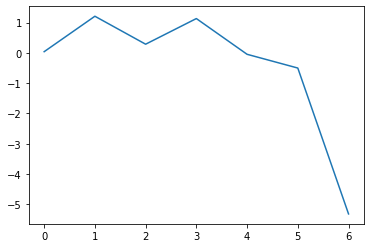

In [36]:
#Trimmed any gdp growth outlierss
quantile = Japan['GDP Growth'].quantile(.95)
trimmedDF = Japan[Japan['GDP Growth'] < quantile]
LR = LinearRegression()
scale = StandardScaler()
scaled_data = scale.fit(trimmedDF[['Fertility rate, total (births per woman)', '14 Under', '15 to 64','64 above', 'Work Population(%)']])
trimmedDF[['Fertility rate, total (births per woman)', '14 Under', '15 to 64','64 above', 'Work Population(%)']] = scale.transform(trimmedDF[['Fertility rate, total (births per woman)', '14 Under', '15 to 64','64 above', 'Work Population(%)']])
y_train =  trimmedDF['GDP Growth'][:50]
y_test = trimmedDF['GDP Growth'][50:]
X_train =  trimmedDF.drop(columns = ['GDP Growth', 'GDP', 'GDP Per Capita'])[:50]
X_test =  trimmedDF.drop(columns = ['GDP Growth', 'GDP', 'GDP Per Capita'])[50:]
LR.fit(X_train, y_train)
prediction = LR.predict(X_test)
plt.plot(prediction)

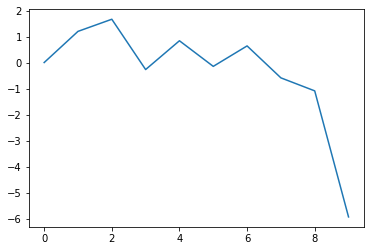

In [37]:
#Without any trimmed any gdp growth outliers
LR = LinearRegression()
scale = StandardScaler()
scaled_data = scale.fit(Japan[['Fertility rate, total (births per woman)', '14 Under', '15 to 64','64 above', 'Work Population(%)']])
Japan[['Fertility rate, total (births per woman)', '14 Under', '15 to 64','64 above', 'Work Population(%)']] = scale.transform(Japan[['Fertility rate, total (births per woman)', '14 Under', '15 to 64','64 above', 'Work Population(%)']])
y_train =  Japan['GDP Growth'][:50]
y_test = Japan['GDP Growth'][50:]
X_train =  Japan.drop(columns = ['GDP Growth', 'GDP', 'GDP Per Capita'])[:50]
X_test =  Japan.drop(columns = ['GDP Growth', 'GDP', 'GDP Per Capita'])[50:]
LR.fit(X_train, y_train)
prediction = LR.predict(X_test)
plt.plot(prediction)

C:\Users\sangr\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


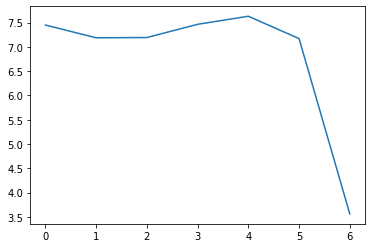

In [38]:
#Trimmed any gdp growth outliers
quantile = China['GDP Growth'].quantile(.95)
trimmedDF = China[China['GDP Growth'] < quantile]
LR = LinearRegression()
scale = StandardScaler()
scaled_data = scale.fit(trimmedDF[['Fertility rate, total (births per woman)', '14 Under', '15 to 64','64 above', 'Work Population(%)']])
trimmedDF[['Fertility rate, total (births per woman)', '14 Under', '15 to 64','64 above', 'Work Population(%)']] = scale.transform(trimmedDF[['Fertility rate, total (births per woman)', '14 Under', '15 to 64','64 above', 'Work Population(%)']])
y_train =  trimmedDF['GDP Growth'][:50]
y_test = trimmedDF['GDP Growth'][50:]
X_train =  trimmedDF.drop(columns = ['GDP Growth', 'GDP', 'GDP Per Capita'])[:50]
X_test =  trimmedDF.drop(columns = ['GDP Growth', 'GDP', 'GDP Per Capita'])[50:]
LR.fit(X_train, y_train)
prediction = LR.predict(X_test)
plt.plot(prediction)

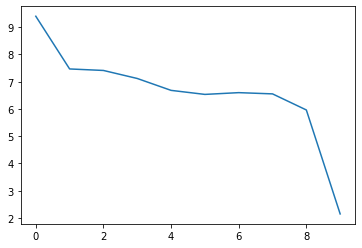

In [39]:
#Without any trimmed any gdp growth outliers
LR = LinearRegression()
scale = StandardScaler()
scaled_data = scale.fit(China[['Fertility rate, total (births per woman)', '14 Under', '15 to 64','64 above', 'Work Population(%)']])
China[['Fertility rate, total (births per woman)', '14 Under', '15 to 64','64 above', 'Work Population(%)']] = scale.transform(China[['Fertility rate, total (births per woman)', '14 Under', '15 to 64','64 above', 'Work Population(%)']])
y_train =  China['GDP Growth'][:50]
y_test = China['GDP Growth'][50:]
X_train =  China.drop(columns = ['GDP Growth', 'GDP', 'GDP Per Capita'])[:50]
X_test =  China.drop(columns = ['GDP Growth', 'GDP', 'GDP Per Capita'])[50:]
LR.fit(X_train, y_train)
prediction = LR.predict(X_test)
plt.plot(prediction)